## 1. Data selection, reasons, and problem definition

In [265]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
pd.options.display.float_format = '{:.1f}'.format
#https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes

percent = 0.1 #샘플 비율 지정

df_audi = pd.read_csv("audi.csv")
df_audi = df_audi.sample(round(len(df_audi)*percent))
df_bmw = pd.read_csv("audi.csv")
df_bmw = df_bmw.sample(round(len(df_bmw)*percent))
df_cclass = pd.read_csv("cclass.csv")
df_cclass = df_cclass.sample(round(len(df_cclass)*percent))
df_focus = pd.read_csv("focus.csv")
df_focus = df_focus.sample(round(len(df_focus)*percent))
df_ford = pd.read_csv("ford.csv")
df_ford = df_ford.sample(round(len(df_ford)*percent))
df_hyundai = pd.read_csv("hyundai.csv")
df_hyundai = df_hyundai.sample(round(len(df_hyundai)*percent))
df_hyundai = df_hyundai.rename(columns={"tax(£)":"tax"}) #칼럼명 변경

df_merc = pd.read_csv("merc.csv")
df_merc = df_merc.sample(round(len(df_merc)*percent))
df_skoda = pd.read_csv("skoda.csv")
df_skoda = df_skoda.sample(round(len(df_skoda)*percent))
df_toyota = pd.read_csv("toyota.csv")
df_toyota = df_toyota.sample(round(len(df_toyota)*percent))
df_vauxhall = pd.read_csv("vauxhall.csv")
df_vauxhall = df_vauxhall.sample(round(len(df_vauxhall)*percent))
df_vw = pd.read_csv("vw.csv")
df_vw = df_vw.sample(round(len(df_vw)*percent))

#데이터 하나로 합치기
df_list = [df_audi, df_bmw, df_cclass, df_focus, df_ford, df_hyundai, df_merc, df_skoda, df_toyota, df_vauxhall, df_vw]
df = pd.concat(df_list, ignore_index=True)

print(df.shape)
df.sample(10)

(10843, 9)


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
4745,Fiesta,2016,8289,Manual,21000,Petrol,0.0,65.7,1.0
300,A4,2019,26499,Semi-Auto,9937,Petrol,145.0,38.2,2.0
1400,Q5,2015,24499,Automatic,40510,Diesel,235.0,42.8,3.0
3882,Focus,2017,10498,Manual,25680,Petrol,150.0,60.1,1.0
10702,Touareg,2018,36650,Automatic,21556,Diesel,145.0,34.0,3.0
6527,CL Class,2017,19990,Semi-Auto,22299,Diesel,150.0,67.3,2.1
5344,Ioniq,2018,17150,Automatic,6493,Hybrid,135.0,78.5,1.6
343,A3,2017,16625,Semi-Auto,53222,Diesel,30.0,61.4,2.0
4755,Kuga,2016,12491,Semi-Auto,53499,Diesel,145.0,52.3,2.0
7072,Fabia,2016,6200,Manual,16384,Petrol,20.0,60.1,1.0


In [266]:
df.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax             float64
mpg             float64
engineSize      float64
dtype: object

In [267]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10843.0,10843.0,10843.0,9908.0,9908.0,10843.0
mean,2017.1,16832.7,22982.1,119.6,54.5,1.6
std,2.1,9480.8,20875.1,63.0,13.4,0.5
min,1995.0,1495.0,1.0,0.0,1.1,0.0
25%,2016.0,10295.0,7500.0,125.0,46.3,1.2
50%,2017.0,14780.0,17343.0,145.0,54.3,1.5
75%,2019.0,20500.0,32280.5,145.0,61.7,2.0
max,2020.0,140319.0,240494.0,570.0,256.8,6.3


In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10843 entries, 0 to 10842
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10843 non-null  object 
 1   year          10843 non-null  int64  
 2   price         10843 non-null  int64  
 3   transmission  10843 non-null  object 
 4   mileage       10843 non-null  int64  
 5   fuelType      10843 non-null  object 
 6   tax           9908 non-null   float64
 7   mpg           9908 non-null   float64
 8   engineSize    10843 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 762.5+ KB


In [269]:
#delete column"tax"
df = df.drop(["tax"], axis = 1)

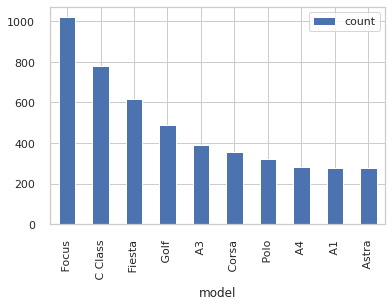

          count
model          
 Focus     1022
 C Class    782
 Fiesta     618
 Golf       490
 A3         388
 Corsa      355
 Polo       319
 A4         283
 A1         279
 Astra      279


Index([' Focus', ' C Class', ' Fiesta', ' Golf', ' A3', ' Corsa', ' Polo',
       ' A4', ' A1', ' Astra'],
      dtype='object', name='model')

In [270]:
#Check Trend: top10 sold out models
import matplotlib.pyplot as plt

models = pd.DataFrame(df.groupby("model")["model"].count())
models.columns = ["count"]
models.sort_values(by=["count"], inplace=True, ascending=False)
models = models.head(10)
models.plot.bar()
plt.show()
print(models)
models.index

          count  avg_price
model                     
 Focus     1022    13589.7
 C Class    782    23702.9
 Fiesta     618    10201.6
 Golf       490    16807.9
 A3         388    17182.4
 Corsa      355     8543.3
 Polo       319    11185.0
 A4         283    20039.8
 A1         279    14446.5
 Astra      279    10526.3
14622.533401272074


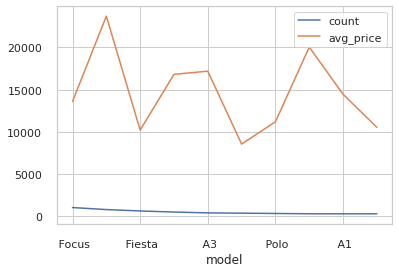

In [271]:
#top10 best selling cars avg price
models_avg_price = df.groupby("model")["price"].mean()
models_avg_price[[' Focus', ' C Class', ' Fiesta', ' Golf', ' A3', ' Corsa', ' Polo',
       ' Q3', ' Astra', ' A4']]
models['avg_price'] = models_avg_price
models.plot.line()
print(models)
print(models["avg_price"].mean())

In [272]:
#top10 best selling cars avg year
models_avg_year = df.groupby("model")["year"].mean()
models_avg_year[[' Focus', ' C Class', ' Fiesta', ' Golf', ' A3', ' Corsa', ' Polo',
       ' Q3', ' Astra', ' A4']]
models['avg_year'] = models_avg_year
print(models)
print(models["avg_year"].mean())

          count  avg_price  avg_year
model                               
 Focus     1022    13589.7    2017.2
 C Class    782    23702.9    2017.4
 Fiesta     618    10201.6    2016.8
 Golf       490    16807.9    2017.2
 A3         388    17182.4    2016.6
 Corsa      355     8543.3    2017.0
 Polo       319    11185.0    2016.9
 A4         283    20039.8    2017.1
 A1         279    14446.5    2016.8
 Astra      279    10526.3    2017.0
2016.989182718136


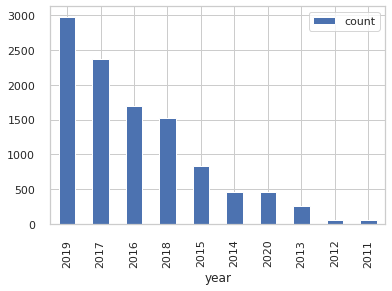

      count
year       
2019   2980
2017   2379
2016   1701
2018   1530
2015    837
2014    456
2020    452
2013    253
2012     62
2011     60


In [273]:
#Check Trend: top10 sold out years

years = pd.DataFrame(df.groupby("year")["year"].count())
years.columns = ["count"]
years.sort_values(by=["count"], inplace=True, ascending=False)
years = years.head(10)
years.plot.bar()
plt.show()
print(years)

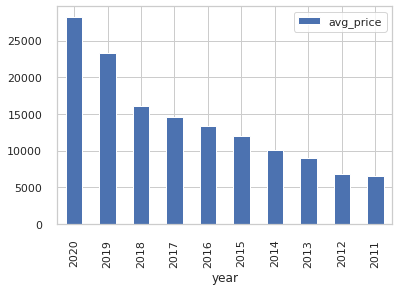

      avg_price
year           
2020    28256.3
2019    23346.8
2018    16130.8
2017    14521.5
2016    13398.0
2015    11921.9
2014    10035.8
2013     8917.2
2012     6813.6
2011     6496.0


In [274]:
#Check Trend: top10 years average price

years_price = pd.DataFrame(df.groupby("year")["price"].mean())
years_price.columns = ["avg_price"]
years_price.sort_values(by=["avg_price"], inplace=True, ascending=False)
years_price = years_price.head(10)
years_price.plot.bar()
plt.show()
print(years_price)

In [275]:
#Check how many 1970 & 1998 cars were sold

condition = (df["year"] == 1970) | (df["year"] == 1998)
df[condition]

,model,year,price,transmission,mileage,fuelType,mpg,engineSize


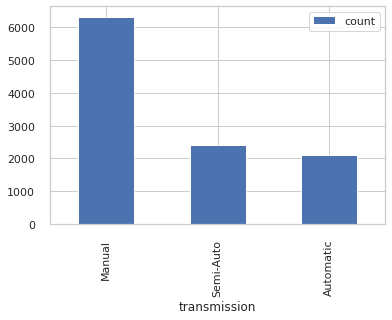

              count
transmission       
Manual         6331
Semi-Auto      2406
Automatic      2106


In [276]:
#Check transmissions
transmission = pd.DataFrame(df.groupby(["transmission"])["transmission"].count())
transmission.columns = ["count"]
transmission.sort_values(by=["count"], inplace=True, ascending=False)
transmission.plot.bar()
plt.show()
print(transmission)

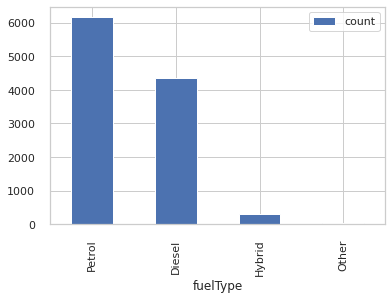

      avg_price
year           
2020    28256.3
2019    23346.8
2018    16130.8
2017    14521.5
2016    13398.0
2015    11921.9
2014    10035.8
2013     8917.2
2012     6813.6
2011     6496.0


In [277]:
#Check fuelType

fuelType = pd.DataFrame(df.groupby("fuelType")["fuelType"].count())
fuelType.columns = ["count"]
fuelType.sort_values(by=["count"], inplace=True, ascending=False)
fuelType.plot.bar()
plt.show()
print(years_price)

In [278]:
#Now we can see
#Years: 15-19 Popular
#Model: Focus / C Class / Fiesta / Golf / A3      
#Transmission: manual
#feul type: Petrol / diessel


## 2. Data preprocessing, EDA, and visualization

8

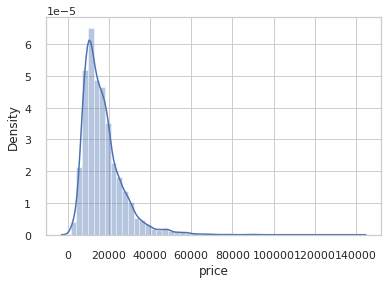

In [279]:
#Check "price" Outliers
sns.distplot(df['price'], kde=True, rug=False)
condition = (df["price"] >75000)
df[condition]["price"].count()

,model,year,price,transmission,mileage,fuelType,mpg,engineSize


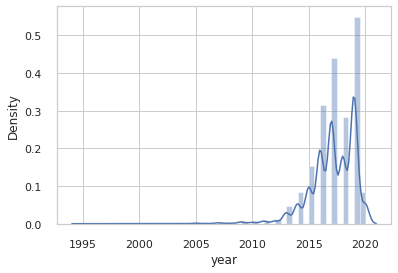

In [280]:
#Check "year" Outliers
sns.distplot(df['year'], kde=True, rug=False)
condition = (df["year"] >2020) | (df["year"] <1990)
df[condition]

4

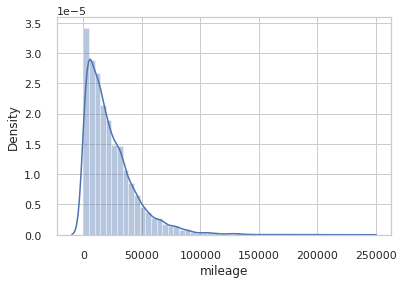

In [281]:
#Check "mileage" Outliers
sns.distplot(df['mileage'], kde=True, rug=False)
condition = (df["mileage"] >150000)
df[condition]["model"].count()

In [282]:
#Delete Outliers
df = df[(df['price'] >= np.percentile(df['price'], 0.5)) & 
        (df['price'] <= np.percentile(df['price'], 99.5)) &
        (df['mileage'] >= np.percentile(df['mileage'], 0.5)) & 
        (df['mileage'] <= np.percentile(df['mileage'], 99.5)) &
        (df['year'] >= np.percentile(df['year'], 0.5)) & 
        (df['year'] <= np.percentile(df['year'], 99.5))]

In [283]:
#fill null values with average of mpg
df = df.fillna(df.mean())

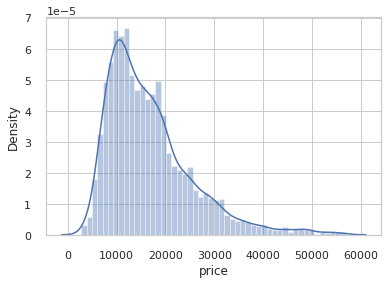

In [284]:
sns.distplot(df['price'], kde=True, rug=False)

22350.791756642568


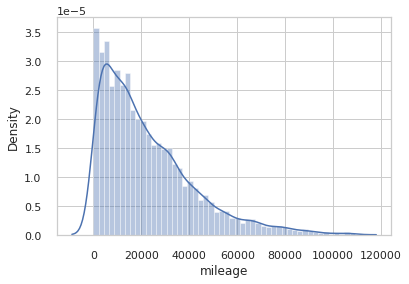

In [285]:
print(df['mileage'].mean())
sns.distplot(df['mileage'], kde=True, rug=False)

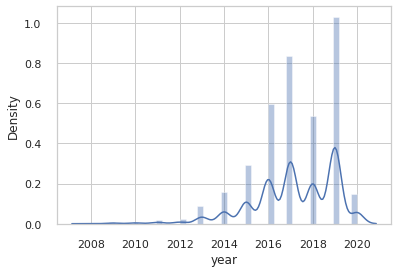

In [286]:
sns.distplot(df['year'], kde=True, rug=False)

In [287]:
# sns.distplot(df[(df['year']>2015)]['mileage'], kde=True, rug=False)

In [288]:
# sns.distplot(df[(df['year']>2009)&(df['year']<2015)]['mileage'], kde=True, rug=False)

In [289]:
# sns.distplot(df[(df['price']<=16500)]['mileage'], kde=True, rug=True)

In [290]:
# sns.distplot(df[(df['price']>16500)]['mileage'], kde=True, rug=True)

In [291]:
# sns.distplot(df[(df['price']>16500)&(df['mileage']<10000)]['year'], kde=True, rug=True)

In [292]:
# sns.distplot(df[(df['price']<=16500)]['year'], kde=True, rug=True)

## 3. Modeling and model analysis

In [293]:
## train set, validation set, test set
from sklearn.model_selection import train_test_split

X = df.drop(columns="price")
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=None)
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)

print("X_val shape: ", X_val.shape)
print("y_val shape: ", y_val.shape)

print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (5964, 7)
y_train shape:  (5964,)
X_val shape:  (2556, 7)
y_val shape:  (2556,)
X_test shape:  (2131, 7)
y_test shape:  (2131,)


#### 3-0. Baseline Model

mean:  16691.181297530748
median:  14795.0


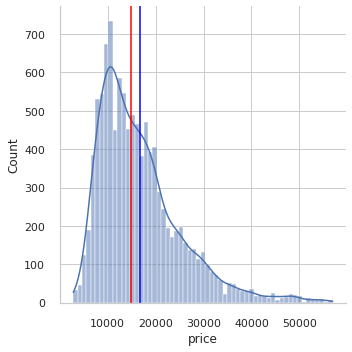

In [294]:
#Baseline Graph
price_mean = y_train.mean()

## SalePrice probability density function
sns.displot(df['price'], kde=True)

## draw mean value and median value on the graph
plt.axvline(df['price'].mean(), color='blue')
plt.axvline(df['price'].median(), color='red');
print("mean: ", df['price'].mean())
print("median: ", df['price'].median())

In [295]:
# Get baseline model error table
from sklearn.metrics import  mean_squared_error, mean_absolute_error, r2_score

price_mean = y_train.mean()
y_pred_baseline = [price_mean] * len(y_val)

mse = mean_squared_error(y_val, y_pred_baseline)
mae = mean_absolute_error(y_val, y_pred_baseline)
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_baseline)

display(pd.DataFrame([['MSE', mse],['MAE', mae],['RMSE', rmse],['R2', r2]], columns=['Metric', 'Score']))

,Metric,Score
0,MSE,76684373.1
1,MAE,6702.2
2,RMSE,8757.0
3,R2,-0.0


#### 3-1. Multiple Linear Regression

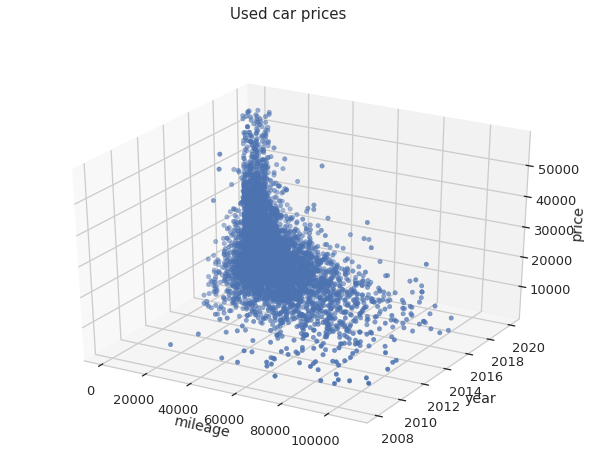

In [296]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style

style.use('seaborn-talk')
fig = plt.figure()

# for 3d plot
ax = fig.gca(projection='3d')

ax.scatter(X_train['mileage'], X_train['year'], y_train)
ax.set_xlabel('mileage', labelpad=10)
ax.set_ylabel('year', labelpad=10)
ax.set_zlabel('price', labelpad=10)

plt.suptitle('Used car prices', fontsize=15)
plt.show()

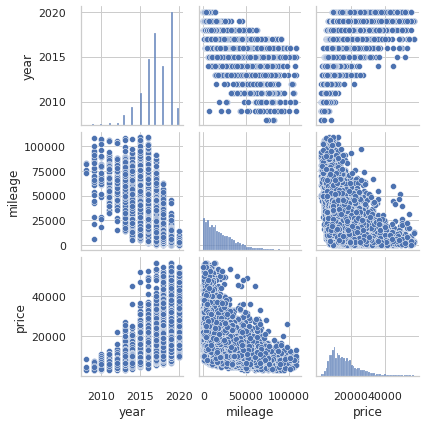

In [297]:
# Compare 3 important features: year, mileage, and price
sns.set(style='whitegrid', context='notebook')
cols = ['year', 'mileage','price']
sns.pairplot(df[cols], height=2);

In [298]:
# Make multiple_linear_model
from sklearn.linear_model import LinearRegression

multiple_linear_model = LinearRegression()

# Select features
features = ["mileage", "year"]

X_train_mlinear = X_train[features]
X_val_mlinear = X_val[features]

# fit into multiple_linear_model
multiple_linear_model.fit(X_train_mlinear, y_train)

# validation set
y_pred_val_linear = multiple_linear_model.predict(X_val_mlinear)

# 1. multiple linear regression error table
from sklearn.metrics import  mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_val, y_pred_val_linear)
mae = mean_absolute_error(y_val, y_pred_val_linear)
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_val_linear)

display(pd.DataFrame([['MSE', mse],['MAE', mae],['RMSE', rmse],['R2', r2]], columns=['Metric', 'Score']))

## Coefficient or parameters
b0 = multiple_linear_model.intercept_
b1, b2 = multiple_linear_model.coef_

print(f'y = {b0:.0f} + {b1:.4f}x\u2081 + {b2:.4f}x\u2082')
#"mileage" dose not matter to the slope

,Metric,Score
0,MSE,54798223.9
1,MAE,5574.6
2,RMSE,7402.6
3,R2,0.3


y = -4139038 + -0.0492x₁ + 2060.7370x₂


y = 21124.8 + -0.196x₁


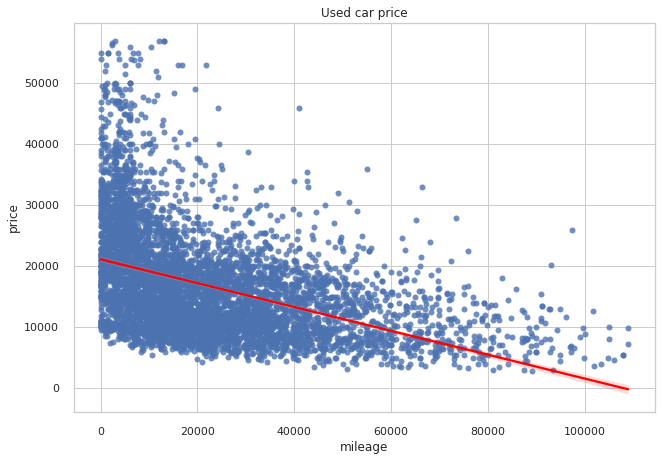

In [299]:
#Make linear regression for checking coefficient about mileage and price
import seaborn as sns
import numpy as np

linear_model = LinearRegression()
X_train_linear = X_train[["mileage"]]
linear_model.fit(X_train_linear, y_train)

## Coefficient or parameters
b0 = linear_model.intercept_
b1 = float(linear_model.coef_)

print(f'y = {b0:.1f} + {b1:.3f}x\u2081')

sns.regplot(x=X_train_linear, y=y_train, line_kws={"color": "red"}).set_title('Used car price');

In [300]:
X_train.head(3)

,model,year,transmission,mileage,fuelType,mpg,engineSize
6503,GLA Class,2017,Semi-Auto,9000,Diesel,56.5,2.1
9016,Corsa,2017,Manual,37800,Petrol,55.4,1.4
531,Q3,2015,Manual,38017,Diesel,49.6,2.0


In [301]:
#categorical type checking
print("model: ",len(X_train.groupby("model")))
print("transmission: ",len(X_train.groupby("transmission")))
print("fuelType: ",len(X_train.groupby("fuelType")))

model:  130
transmission:  3
fuelType:  4


In [302]:
# ordinal encoder and standard scaler
!pip install category_encoders

# from category_encoders import OneHotEncoder
from category_encoders import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

## 원핫 인코딩
# encoder = OneHotEncoder(use_cat_names = True)
ord_enc = OrdinalEncoder(handle_missing="value")
scaler = StandardScaler()

X_train_ord_enc = ord_enc.fit_transform(X_train)
X_val_ord_enc = ord_enc.transform(X_val)
X_test_ord_enc = ord_enc.transform(X_test)

X_train_scaled = scaler.fit_transform(X_train_ord_enc)
X_val_scaled = scaler.transform(X_val_ord_enc)
X_test_scaled = scaler.transform(X_test_ord_enc)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [303]:
X_train_ord_enc.head(3)

,model,year,transmission,mileage,fuelType,mpg,engineSize
6503,1,2017,1,9000,1,56.5,2.1
9016,2,2017,2,37800,2,55.4,1.4
531,3,2015,2,38017,1,49.6,2.0


1 features
Selected names:  Index(['engineSize'], dtype='object')
Test MAE: $5,276
Test R2: 0.4059598431813216 

2 features
Selected names:  Index(['year', 'engineSize'], dtype='object')
Test MAE: $3,573
Test R2: 0.7094938196373541 

3 features
Selected names:  Index(['year', 'mileage', 'engineSize'], dtype='object')
Test MAE: $3,403
Test R2: 0.7341489279441903 

4 features
Selected names:  Index(['year', 'mileage', 'mpg', 'engineSize'], dtype='object')
Test MAE: $3,337
Test R2: 0.7353983822910032 

5 features
Selected names:  Index(['year', 'mileage', 'fuelType', 'mpg', 'engineSize'], dtype='object')
Test MAE: $3,316
Test R2: 0.7374046433048953 

6 features
Selected names:  Index(['model', 'year', 'mileage', 'fuelType', 'mpg', 'engineSize'], dtype='object')
Test MAE: $3,316
Test R2: 0.7373207807788889 

7 features
Selected names:  Index(['model', 'year', 'transmission', 'mileage', 'fuelType', 'mpg',
       'engineSize'],
      dtype='object')
Test MAE: $3,309
Test R2: 0.73851173848958

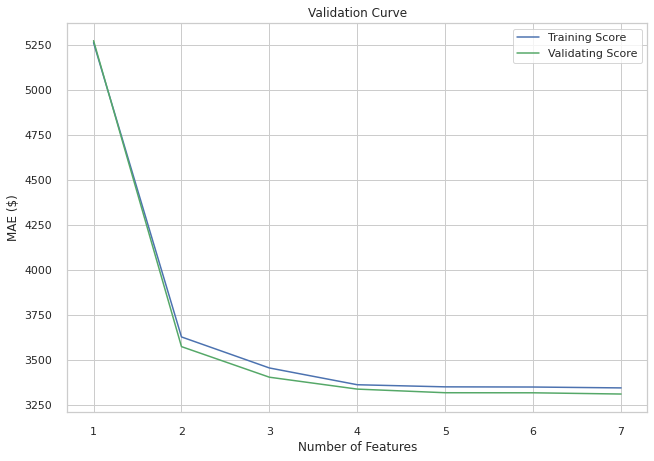

In [304]:
# features를 몇 개 선책하는 것이 좋은지 알아 봅시다.

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.feature_selection import f_regression, SelectKBest

training = []
testing = []
ks = range(1, len(X_train_ord_enc.columns)+1)

# 1 부터 특성 수 만큼 사용한 모델을 만들어서 MAE 값을 비교 합니다.
for k in range(1, len(X_train_ord_enc.columns)+ 1):
    print(f'{k} features')
    
    selector = SelectKBest(score_func=f_regression, k=k)
    
    X_train_selected = selector.fit_transform(X_train_ord_enc, y_train)
    X_val_selected = selector.transform(X_val_ord_enc)
    
    all_names = X_train_ord_enc.columns
    selected_mask = selector.get_support()
    selected_names = all_names[selected_mask]
    print('Selected names: ', selected_names)
    
    model = LinearRegression()
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_train_selected)
    mae = mean_absolute_error(y_train, y_pred)
    training.append(mae)
    
    y_pred = model.predict(X_val_selected)
    mae = mean_absolute_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    testing.append(mae)
    print(f'Test MAE: ${mae:,.0f}')
    print(f'Test R2: {r2} \n')

plt.plot(ks, training, label='Training Score', color='b')
plt.plot(ks, testing, label= "Validating Score", color='g')
plt.ylabel("MAE ($)")
plt.xlabel("Number of Features")
plt.title('Validation Curve')
plt.legend()
plt.show()

In [305]:
# Tunning hyperparameters and features for Multiple_linear_model

# Select features
features = ['engineSize', 'transmission', 'year']

X_train_mlinear_new = X_train_ord_enc[features]
X_val_mlinear_new = X_val_ord_enc[features]

# fit into multiple_linear_model
multiple_linear_model.fit(X_train_mlinear_new, y_train)

# validation set
y_pred_val_mlinear_new = multiple_linear_model.predict(X_val_mlinear_new)

# 1. multiple linear regression error table
from sklearn.metrics import  mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_val, y_pred_val_mlinear_new)
mae = mean_absolute_error(y_val, y_pred_val_mlinear_new)
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_val_mlinear_new)

display(pd.DataFrame([['MSE', mse],['MAE', mae],['RMSE', rmse],['R2', r2]], columns=['Metric', 'Score']))

## Coefficient or parameters
b0 = multiple_linear_model.intercept_
b1, b2, b3 = multiple_linear_model.coef_

print(f'y = {b0:.0f} + {b1:.4f}x\u2081 + {b2:.4f}x\u2082 + {b3:.4f}x\u2083')
#"mileage" dose not matter to the slope

,Metric,Score
0,MSE,22191135.8
1,MAE,3566.0
2,RMSE,4710.7
3,R2,0.7


y = -5279176 + 10593.2776x₁ + -286.5085x₂ + 2617.1108x₃


#### 3-2. Ridge Regression

Ridge Regression, alpha=0.001
Validation MAE: $3,309
Validation R2: 0.738


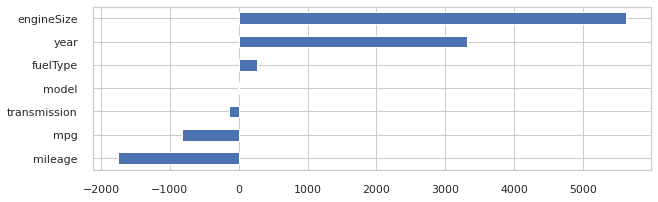

Ridge Regression, alpha=0.005
Validation MAE: $3,310
Validation R2: 0.738


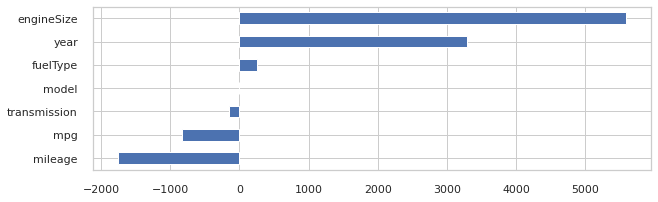

Ridge Regression, alpha=0.01
Validation MAE: $3,311
Validation R2: 0.738


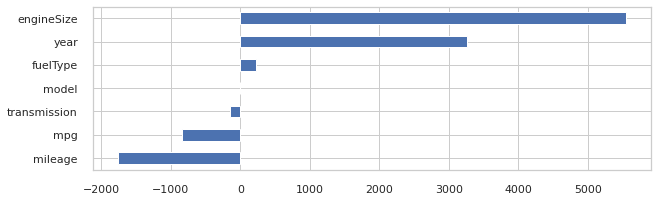

Ridge Regression, alpha=0.02
Validation MAE: $3,313
Validation R2: 0.737


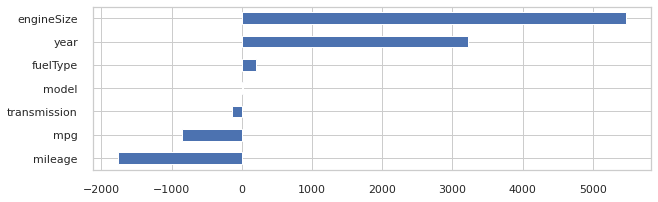

Ridge Regression, alpha=0.03
Validation MAE: $3,317
Validation R2: 0.735


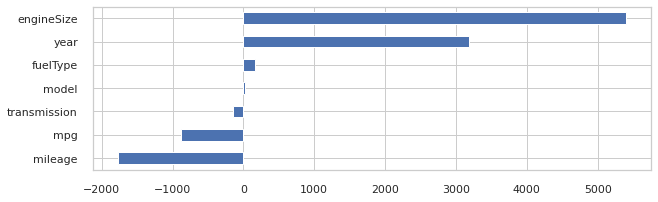

Ridge Regression, alpha=0.05
Validation MAE: $3,325
Validation R2: 0.733


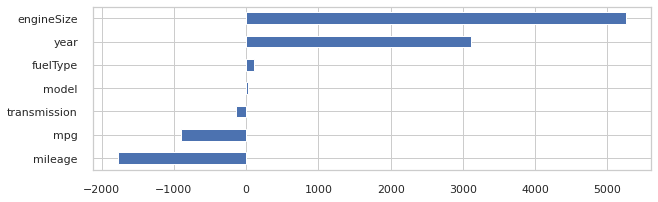

Ridge Regression, alpha=0.07
Validation MAE: $3,335
Validation R2: 0.730


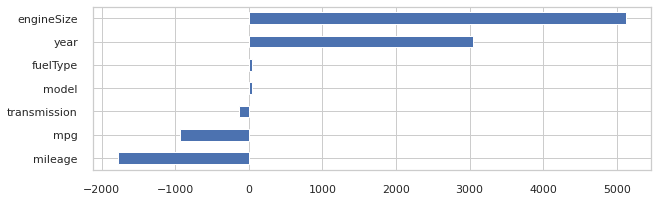

Ridge Regression, alpha=1.0
Validation MAE: $4,160
Validation R2: 0.576


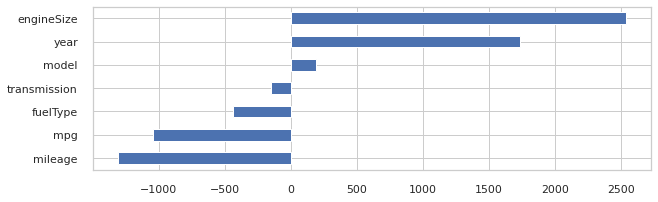

Ridge Regression, alpha=10.0
Validation MAE: $6,086
Validation R2: 0.166


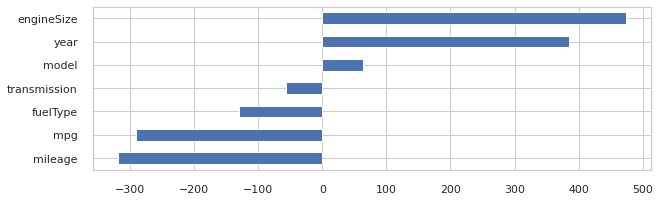

In [306]:
from sklearn.metrics import r2_score
from sklearn.linear_model import RidgeCV
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

for alpha in [0.001, 0.005, 0.01, 0.02, 0.03, 0.05, 0.07, 1.0, 10.0]:
        
    print(f'Ridge Regression, alpha={alpha}')

    # Ridge 모델 학습
    Ridge_model = Ridge(alpha=alpha, normalize=True)  
    Ridge_model.fit(X_train_scaled, y_train)
    y_pred = Ridge_model.predict(X_val_scaled)

    # MAE for test
    mae = mean_absolute_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    
    print(f'Validation MAE: ${mae:,.0f}')
    print(f'Validation R2: {r2:,.3f}')
    
    # plot coefficients
    coefficients = pd.Series(Ridge_model.coef_, X_train.columns)
    plt.figure(figsize=(10,3))
    coefficients.sort_values().plot.barh()
    plt.show()


In [307]:
#Best Ridge Model
Ridge_model = Ridge(alpha=0.05, normalize=True)  
Ridge_model.fit(X_train_scaled, y_train)
y_pred_val_Ridge = Ridge_model.predict(X_val_scaled)

mse = mean_squared_error(y_val, y_pred_val_Ridge)
mae = mean_absolute_error(y_val, y_pred_val_Ridge)
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_val_Ridge)

display(pd.DataFrame([['MSE', mse],['MAE', mae],['RMSE', rmse],['R2', r2]], columns=['Metric', 'Score']))

,Metric,Score
0,MSE,20470159.0
1,MAE,3324.8
2,RMSE,4524.4
3,R2,0.7


#### 3-3. Random Forest

In [308]:
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

pipe = make_pipeline(
    OrdinalEncoder(handle_missing="value"), 
    SimpleImputer(), 
    RandomForestRegressor(n_estimators=10, random_state=None, n_jobs=-1)
)

pipe.fit(X_train, y_train)
print('검증 정확도: ', pipe.score(X_val, y_val))

검증 정확도:  0.9067468590864363


In [309]:
# Check feature importances
# 랜덤포레스트에서는 학습 후에 특성들의 중요도 정보(Gini importance)를 기본으로 제공합니다. 
# 중요도는 노드들의 지니불순도(Gini impurity)를 가지고 계산하는데, 노드가 중요할 수록 불순도가 크게 감소한다는 사실을 이용합니다.
# 노드는 한 특성의 값을 기준으로 분리가 되기 때문에 불순도를 크게 감소하는데 많이 사용된 특성이 중요도가 올라갈 것입니다.

In [310]:
from sklearn.model_selection import RandomizedSearchCV
from category_encoders import OrdinalEncoder
from category_encoders import TargetEncoder
from scipy.stats import randint, uniform

pipe = make_pipeline(
    # TargetEncoder(), 
    OrdinalEncoder(), 
    SimpleImputer(), 
    RandomForestRegressor(random_state=None)
)

dists = {
    # 'targetencoder__smoothing': [2.,20.,50.,60.,100.,500.,1000.], # int로 넣으면 error(bug)
    # 'targetencoder__min_samples_leaf': randint(1, 10),     
    'simpleimputer__strategy': ['mean', 'median'], 
    'randomforestregressor__n_estimators': randint(50, 500), 
    'randomforestregressor__max_depth': [5, 10, 15, 20, None], 
    'randomforestregressor__max_features': uniform(0, 1) # max_features
}

clf = RandomizedSearchCV(
    pipe, 
    param_distributions=dists, 
    n_iter=20, 
    cv=3, 
    scoring='neg_mean_absolute_error',  
    verbose=1,
    n_jobs=-1
)

clf.fit(X_train, y_train);

Fitting 3 folds for each of 20 candidates, totalling 60 fits


In [311]:
print('최적 하이퍼파라미터: ', clf.best_params_)
print('MAE: ', -clf.best_score_)

최적 하이퍼파라미터:  {'randomforestregressor__max_depth': None, 'randomforestregressor__max_features': 0.6735895606651763, 'randomforestregressor__n_estimators': 144, 'simpleimputer__strategy': 'mean'}
MAE:  1726.4507853351204


In [312]:
# 만들어진 모델에서 가장 성능이 좋은 모델을 불러옵니다.
pipe = clf.best_estimator_

from sklearn.metrics import mean_absolute_error

y_pred_val_rf = pipe.predict(X_val)
mse = mean_squared_error(y_val, y_pred_val_rf)
mae = mean_absolute_error(y_val, y_pred_val_rf)
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_val_rf)

display(pd.DataFrame([['MSE', mse],['MAE', mae],['RMSE', rmse],['R2', r2]], columns=['Metric', 'Score']))

,Metric,Score
0,MSE,6503921.3
1,MAE,1673.7
2,RMSE,2550.3
3,R2,0.9


#### 3-4. Permutation importance, pdp, shap

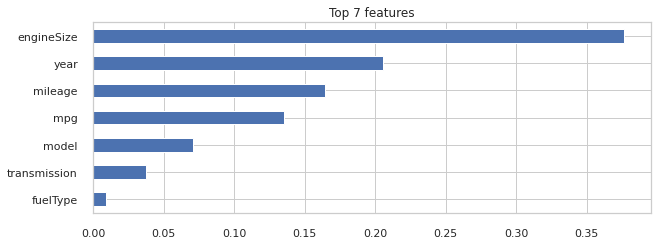

In [313]:
# Feature Importances(Mean decrease impurity, MDI)

# sklearn 트리 기반 분류기에서 디폴트로 사용되는 특성 중요도는 속도는 빠르지만 결과를 주의해서 봐야 합니다. 
# 각각 특성을 모든 트리에 대해 평균불순도감소(mean decrease impurity)를 계산한 값입니다.

rf = pipe.named_steps['randomforestregressor']
importances = pd.Series(rf.feature_importances_, X_train.columns)

%matplotlib inline
import matplotlib.pyplot as plt

n = 7
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh();

In [314]:
# Permutation Importance, Mean Decrease Accuracy,MDA

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.pipeline import Pipeline
import eli5
from eli5.sklearn import PermutationImportance

# encoder, imputer를 preprocessing으로 묶었습니다. 후에 eli5 permutation 계산에 사용합니다
pipe = Pipeline([
    ('preprocessing', make_pipeline(OrdinalEncoder(), SimpleImputer())),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=2, n_jobs=-1)) 
])

pipe.fit(X_train, y_train)

# permuter 정의
permuter = PermutationImportance(
    pipe.named_steps['rf'], # model
    scoring='neg_mean_absolute_error', # regressor
    n_iter=5, # 다른 random seed를 사용하여 5번 반복
    random_state=2
)

# permuter 계산은 preprocessing 된 X_val을 사용합니다.
X_val_transformed = pipe.named_steps['preprocessing'].transform(X_val)

# 실제로 fit 의미보다는 스코어를 다시 계산하는 작업입니다
permuter.fit(X_val_transformed, y_val);

In [315]:
feature_names = X_val.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values(ascending = False)

engineSize     3642.2
year           1927.7
model          1108.1
mileage        1104.5
mpg             739.6
transmission    274.9
fuelType        153.4
dtype: float64

In [316]:
# 특성별 score 확인
eli5.show_weights(
    permuter, 
    top=None, # top n 지정 가능, None 일 경우 모든 특성 
    feature_names=feature_names # list 형식으로 넣어야 합니다
)

Weight,Feature
3642.2493 ± 95.7939,engineSize
1927.6940 ± 36.6546,year
1108.1021 ± 57.0354,model
1104.5134 ± 34.2442,mileage
739.5704 ± 49.7049,mpg
274.9214 ± 30.1731,transmission
153.4017 ± 23.7630,fuelType


In [317]:
X_train_transformed = pipe.named_steps['preprocessing'].transform(X_train)
model_final = pipe.named_steps['rf'].fit(X_train_transformed,y_train)

In [318]:
#transformed train data convert to Dataframe
X_train_transformed_df = pd.DataFrame(X_train_transformed)
X_train_transformed_df.columns = X_train.columns
X_train_transformed_df.head()

,model,year,transmission,mileage,fuelType,mpg,engineSize
0,1.0,2017.0,1.0,9000.0,1.0,56.5,2.1
1,2.0,2017.0,2.0,37800.0,2.0,55.4,1.4
2,3.0,2015.0,2.0,38017.0,1.0,49.6,2.0
3,4.0,2019.0,1.0,7147.0,1.0,48.7,2.0
4,5.0,2018.0,2.0,25166.0,1.0,60.1,2.0


In [319]:
!pip install shap
!pip install pdpbox

example1 = X_train_transformed_df.iloc[[10]]

# predict example1
model_final.predict(example1)

import shap
explainer = shap.TreeExplainer(model_final)
shap_values = explainer.shap_values(example1)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values,
    features=example1
)

In [325]:
example2 = X_train_transformed_df.iloc[[100]]

# predict example1
model_final.predict(example2)

import shap
explainer = shap.TreeExplainer(model_final)
shap_values = explainer.shap_values(example2)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values,
    features=example2
)

In [326]:
example3 = X_train_transformed_df.iloc[[1000]]

# predict example1
model_final.predict(example3)

import shap
explainer = shap.TreeExplainer(model_final)
shap_values = explainer.shap_values(example3)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values,
    features=example3
)

In [ ]:
shap.summary_plot(shap_values, X_train_transformed_df.iloc[:10000], plot_type="bar")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 배열형태로 반환
ft_importance_values = model_final.feature_importances_

# 정렬과 시각화를 쉽게 하기 위해 series 전환
ft_series = pd.Series(ft_importance_values, index = X_train.columns)
ft_top7 = ft_series.sort_values(ascending=False)[:7]

# 시각화
plt.figure(figsize=(8,6))
plt.title('Feature Importance Top 7')
sns.barplot(x=ft_top7, y=ft_top7.index)
plt.show()

In [ ]:
# eliminate "fuelType" and rebuild the model
def feature_engineering(data):
  data = data.drop(columns=["fuelType"])
  return data

X_train = feature_engineering(X_train)
X_val = feature_engineering(X_val)
X_test = feature_engineering(X_test)

In [ ]:
#New Random Forest Model
pipe = make_pipeline(
    TargetEncoder(), 
    # OrdinalEncoder(), 
    SimpleImputer(), 
    RandomForestRegressor(random_state=None)
)

dists = {
    'targetencoder__smoothing': [2.,20.,50.,60.,100.,500.,1000.], # int로 넣으면 error(bug)
    'targetencoder__min_samples_leaf': randint(1, 10),     
    'simpleimputer__strategy': ['mean', 'median'], 
    'randomforestregressor__n_estimators': randint(50, 500), 
    'randomforestregressor__max_depth': [5, 10, 15, 20, None], 
    'randomforestregressor__max_features': uniform(0, 1) # max_features
}

clf = RandomizedSearchCV(
    pipe, 
    param_distributions=dists, 
    n_iter=40, 
    cv=3, 
    scoring='neg_mean_absolute_error',  
    verbose=1,
    n_jobs=-1
)

clf.fit(X_train, y_train);

In [ ]:
print('최적 하이퍼파라미터: ', clf.best_params_)
print('MAE: ', -clf.best_score_)

In [ ]:
# 만들어진 모델에서 가장 성능이 좋은 모델을 불러옵니다.
pipe = clf.best_estimator_

from sklearn.metrics import mean_absolute_error

y_pred_val_rf = pipe.predict(X_val)
mse = mean_squared_error(y_val, y_pred_val_rf)
mae = mean_absolute_error(y_val, y_pred_val_rf)
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_val_rf)

display(pd.DataFrame([['MSE', mse],['MAE', mae],['RMSE', rmse],['R2', r2]], columns=['Metric', 'Score']))

#### 3-5. Test Model and Analysis

In [ ]:
#Test the baseline model

# ordinal encoder
ord_enc = OrdinalEncoder(handle_missing="value")
ord_enc.fit_transform(X_train)
X_test_ord_enc = ord_enc.transform(X_test)

# Select features
features = ['engineSize', 'transmission', 'year']
X_test_baseline = X_test_ord_enc[features]

# test set
y_pred_test_baseline = multiple_linear_model.predict(X_test_baseline)

mse = mean_squared_error(y_test, y_pred_test_baseline)
mae = mean_absolute_error(y_test, y_pred_test_baseline)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred_test_baseline)

display(pd.DataFrame([['MSE', mse],['MAE', mae],['RMSE', rmse],['R2', r2]], columns=['Metric', 'Score']))

In [ ]:
#Test the final model

y_pred_test_final = pipe.predict(X_test)
mse = mean_squared_error(y_test, y_pred_test_final)
mae = mean_absolute_error(y_test, y_pred_test_final)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred_test_final)

display(pd.DataFrame([['MSE', mse],['MAE', mae],['RMSE', rmse],['R2', r2]], columns=['Metric', 'Score']))

In [ ]:
#Check Error Rate
df_table = pd.DataFrame({"y_test":y_test,"baseline_model":y_pred_test_baseline, "base_error(%)":None,"final_model":y_pred_test_best, "final_error(%)":None})

df_table["base_error(%)"] = (abs(df_table["y_test"] - df_table["baseline_model"])/df_table["y_test"])*100
df_table["final_error(%)"] = (abs(df_table["y_test"] - df_table["final_model"])/df_table["y_test"])*100

df_table.head()

In [ ]:
#Comparision between baseline model and final model
df_analysis = pd.DataFrame({"error(%)":[1,5,10,20,30,"sum"], "baseline_model":[1,2,3,4,5,0], "final_model":[0,0,0,0,0,0]})
df_analysis.set_index("error(%)", inplace = True)

total_size = len(df_table)
df_analysis.iloc[0,0] = (df_table[df_table["base_error(%)"]<=1]["base_error(%)"].count())/total_size*100
df_analysis.iloc[0,1] = (df_table[df_table["final_error(%)"]<=1]["final_error(%)"].count())/total_size*100

df_analysis.iloc[1,0] = (df_table[(df_table["base_error(%)"]>1)&(df_table["base_error(%)"]<=5)]["base_error(%)"].count())/total_size*100
df_analysis.iloc[1,1] = (df_table[(df_table["final_error(%)"]>1)&(df_table["final_error(%)"]<=5)]["final_error(%)"].count())/total_size*100

df_analysis.iloc[2,0] = (df_table[(df_table["base_error(%)"]>5)&(df_table["base_error(%)"]<=10)]["base_error(%)"].count())/total_size*100
df_analysis.iloc[2,1] = (df_table[(df_table["final_error(%)"]>5)&(df_table["final_error(%)"]<=10)]["final_error(%)"].count())/total_size*100

df_analysis.iloc[3,0] = (df_table[(df_table["base_error(%)"]>10)&(df_table["base_error(%)"]<=20)]["base_error(%)"].count())/total_size*100
df_analysis.iloc[3,1] = (df_table[(df_table["final_error(%)"]>10)&(df_table["final_error(%)"]<=20)]["final_error(%)"].count())/total_size*100

df_analysis.iloc[4,0] = (df_table[(df_table["base_error(%)"]>20)&(df_table["base_error(%)"]<=30)]["base_error(%)"].count())/total_size*100
df_analysis.iloc[4,1] = (df_table[(df_table["final_error(%)"]>20)&(df_table["final_error(%)"]<=30)]["final_error(%)"].count())/total_size*100

df_analysis.iloc[5,0] = df_analysis.iloc[:5,0].sum()
df_analysis.iloc[5,1] = df_analysis.iloc[:5,1].sum()

df_analysis

In [ ]:
df_analysis.plot.bar()
plt.title('Used Car Price Prediction Model Analysis', fontsize=16)
plt.ylabel('percentage(%)', fontsize=12)
plt.xlabel('Error Rate', fontsize=12)
plt.show()

In [ ]:
#For the future
"""
- Model still needs higher accuracy, becuase above 5% error rate is Not good at all. and they are 

"""